In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
pip install imbalanced-learn

# **IMPORT DATASET**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datamining/survey_lung_cancer.csv')

# **EKSPLORATION DATASET**

In [ ]:
#Menampilkan 5 data teratas
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#Melihat informasi secara detail mengenai dataset yang dimuiliki
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#Mendeskripsikan dataset
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# **DATA PRE-PROCESSING**

In [ ]:
#Menghitung data kosong (missing value) masing-masing feature
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Dikarenakan tidak ada data kosong (missing value), maka dilanjutkan ke proses selanjutnya, yaitu data Encoding

# **ENCODING**

In [ ]:
#Merubah Yes dan No menjadi 1 dan 0
num_pred = {
    'M' : 1,
    'F' : 0
}
df['GENDER'] = df['GENDER'].map(num_pred)

In [ ]:
#Merubah Yes dan No menjadi 1 dan 0
num_pred = {
    'YES' : 1,
    'NO' : 0
}
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(num_pred)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

setelah melalukan pelabelan, selanjutnya akan dilihat korelasi antar feature dan dilakukan seleksi feature dengan Pearson Correlation Selection

# **SELEKSI FEATURE**

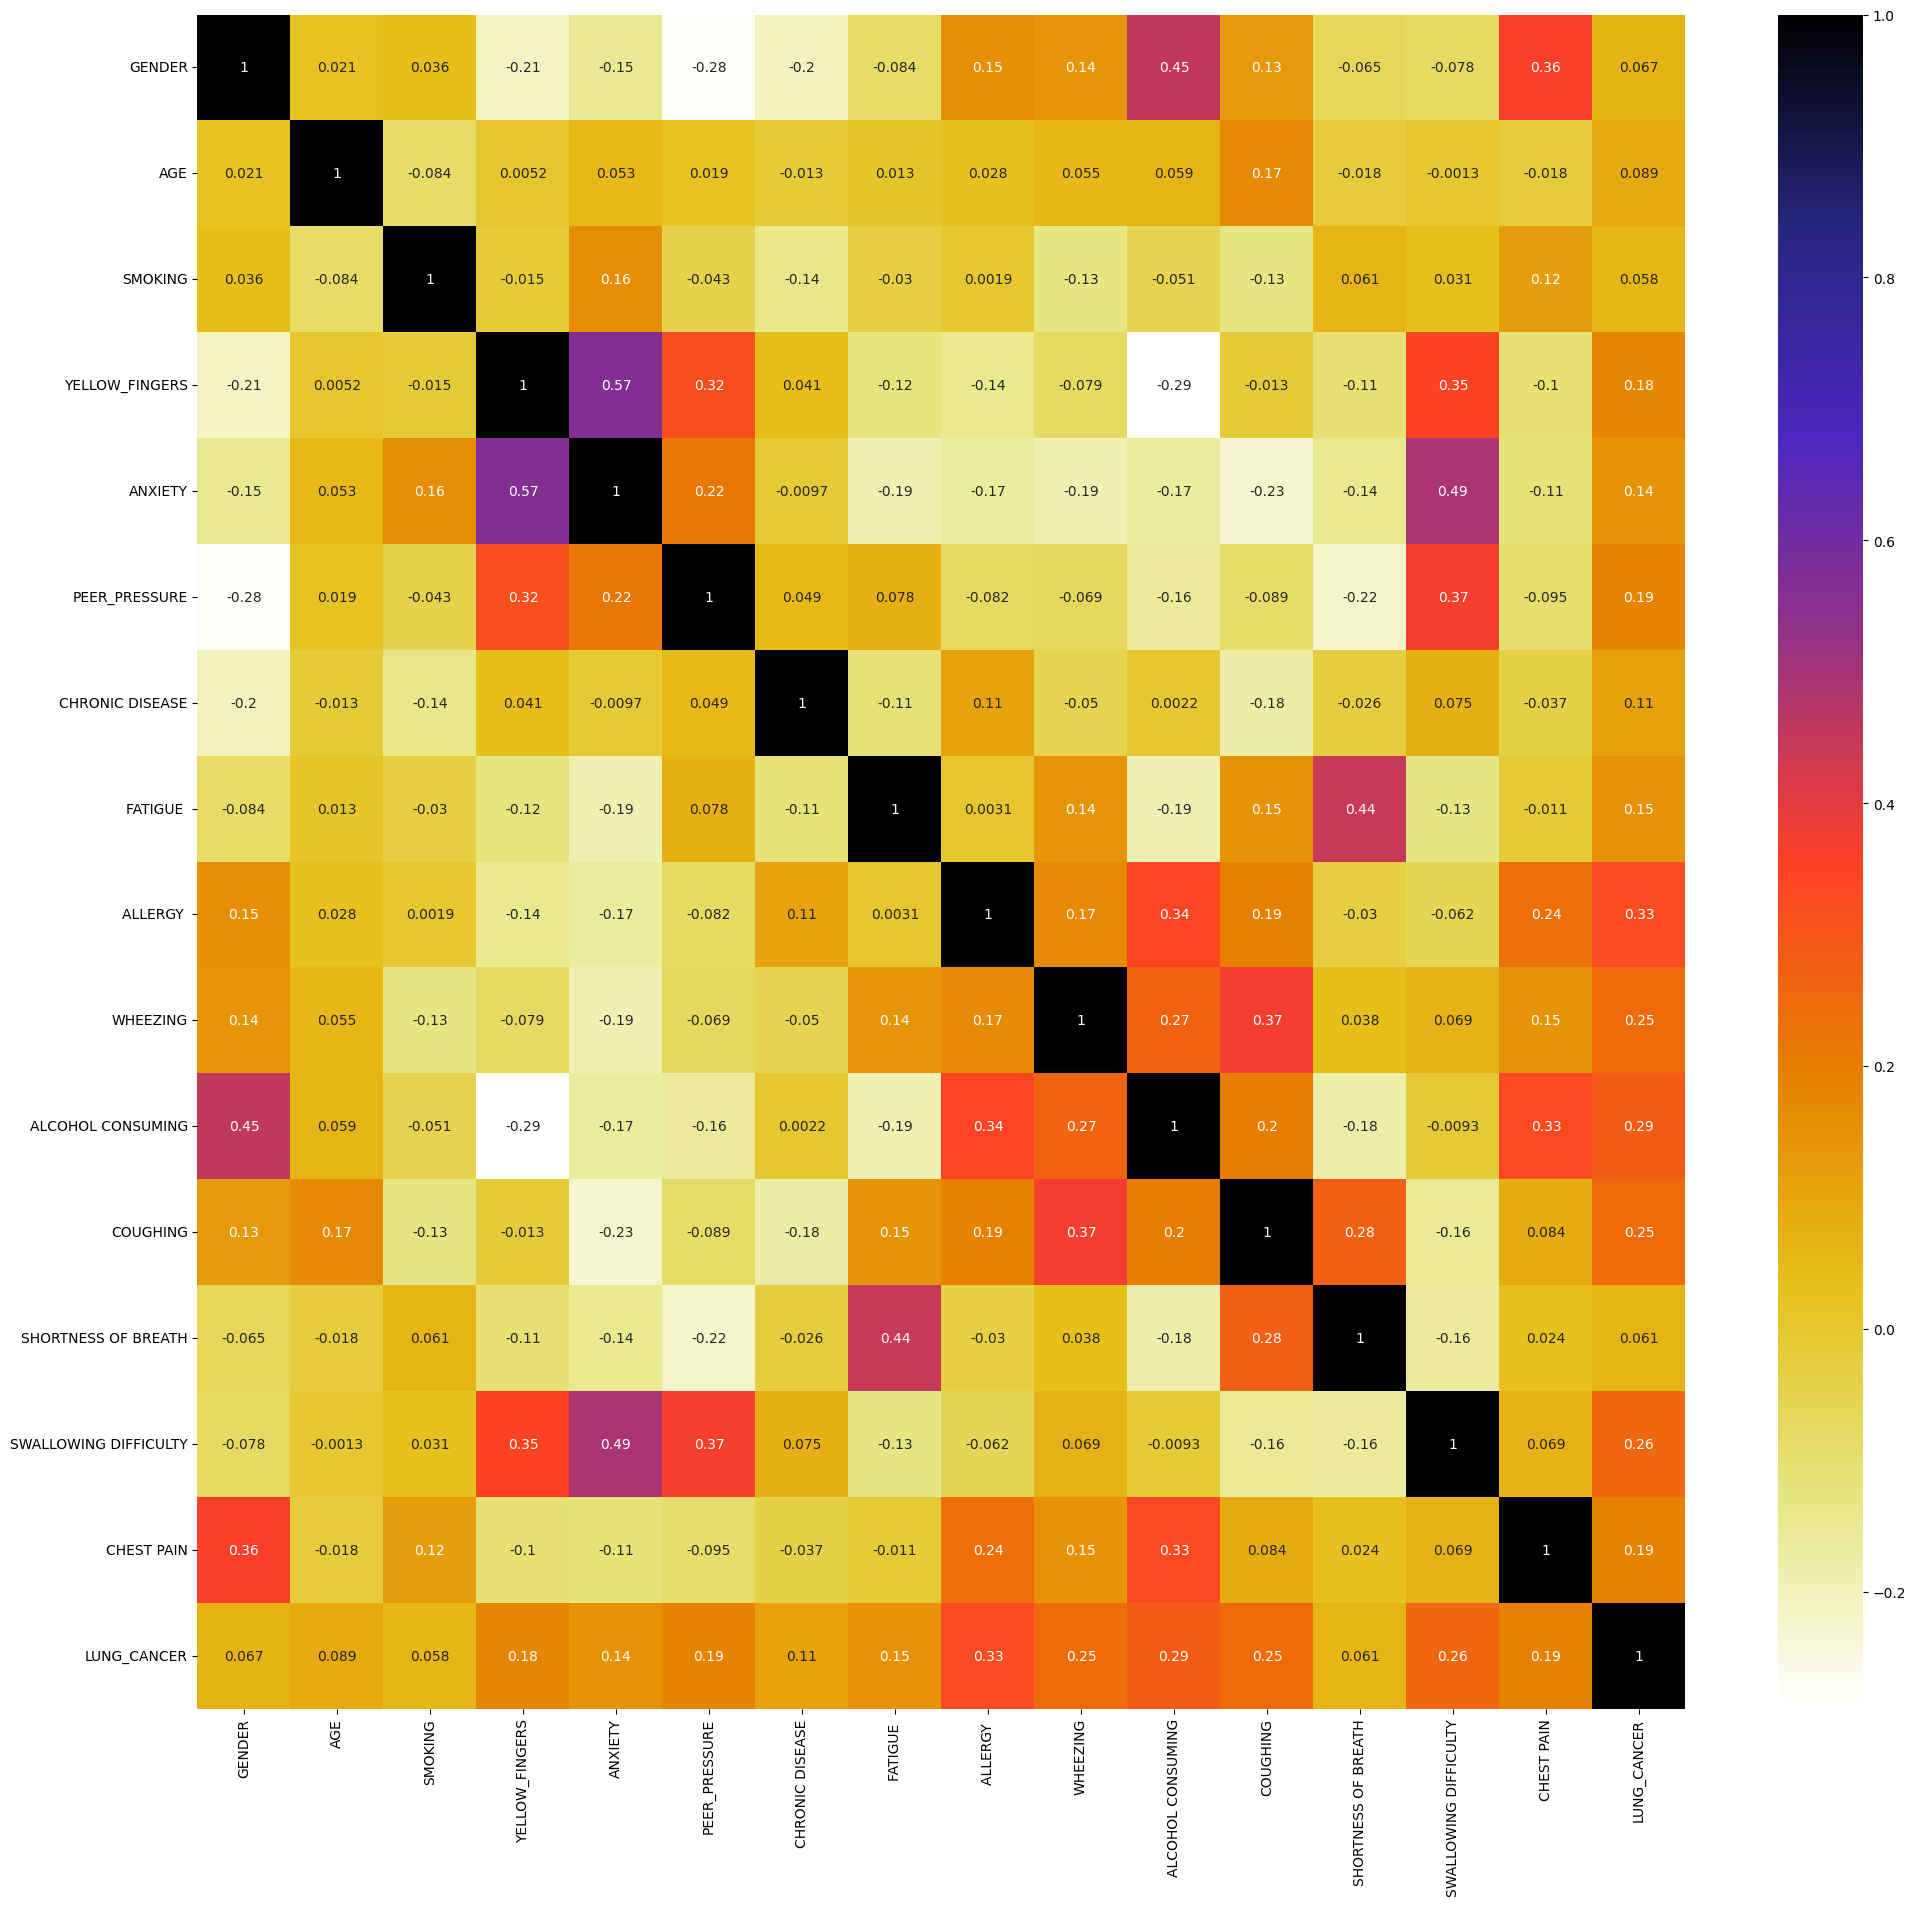

In [ ]:
cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['LUNG_CANCER'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1] # Korelasi mendekati 0 berarti lemah, mendekati 1 berarti kuat. Oleh karena itu saya memilih feature dengan korelasi > 0.1
relevant_features

YELLOW_FINGERS           0.181339
ANXIETY                  0.144947
PEER_PRESSURE            0.186388
CHRONIC DISEASE          0.110891
FATIGUE                  0.150673
ALLERGY                  0.327766
WHEEZING                 0.249300
ALCOHOL CONSUMING        0.288533
COUGHING                 0.248570
SWALLOWING DIFFICULTY    0.259730
CHEST PAIN               0.190451
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64

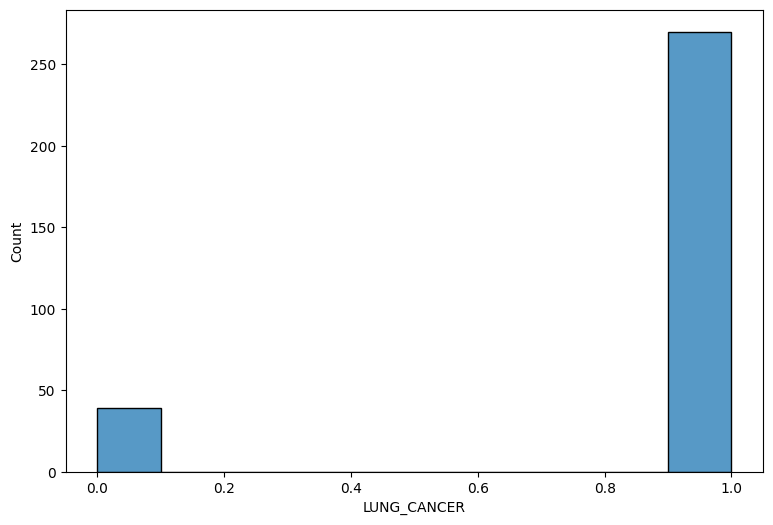

In [ ]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=df, x='LUNG_CANCER')
plt.show()

In [ ]:
#Menghapus column selain 'Obesity','Coughing of Blood','Level'
#df.drop(df.columns.difference(['AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING ', 'SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],), 1, inplace=True)
#df.drop(df.columns.difference(['YELLOW_FINGERS','PEER_PRESSURE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']), axis=1,  inplace=True)
df1 = df.drop(['GENDER','AGE','SMOKING','SHORTNESS OF BREATH'], axis=1)
df1.head()

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,1,1,2,1,2,2,2,2,2,1
1,1,1,1,2,2,2,1,1,1,2,2,1
2,1,1,2,1,2,1,2,1,2,1,2,0
3,2,2,1,1,1,1,1,2,1,2,2,0
4,2,1,1,1,1,1,2,1,2,1,1,0


Setelah melakukan selection feature menggunakan metode Pearson Correlation, selanjutnya adalah melakukan model klasifikasi dengan KNN

# **SMOTE OVERSAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# x = atribut yang memperngaruhi LUNG_CANCER
# y = label target
x = df1.drop(['LUNG_CANCER'],axis=1)
y = df1['LUNG_CANCER']

In [ ]:
print(x.shape)
print(y.shape)

(309, 11)
(309,)


In [ ]:
x

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,1,1,2,1,2,2,2,2,2
1,1,1,1,2,2,2,1,1,1,2,2
2,1,1,2,1,2,1,2,1,2,1,2
3,2,2,1,1,1,1,1,2,1,2,2
4,2,1,1,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,2,1,1,2,2,2,1
305,1,1,1,1,2,2,2,2,2,1,2
306,1,1,1,1,1,2,2,2,2,1,2
307,1,2,1,1,2,2,1,2,2,1,2


In [ ]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [ ]:
sm = SMOTE(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x,y)

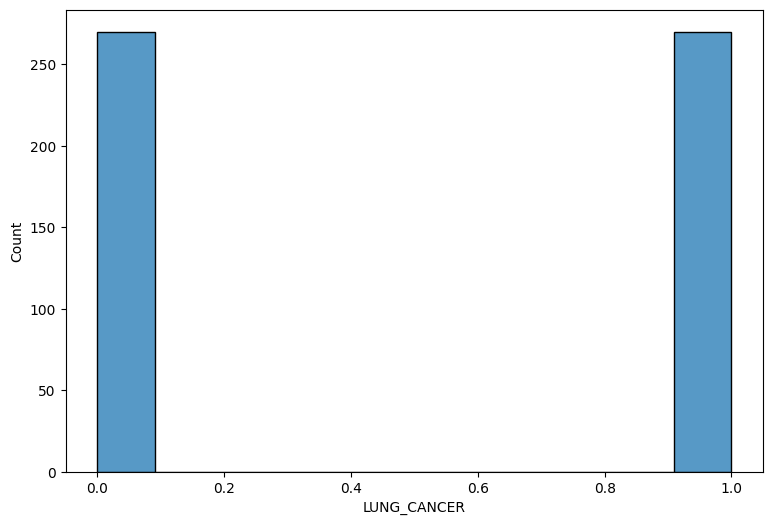

In [ ]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

In [ ]:
print(y_sampling.shape)

(540,)


# **DATA MODELLING**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sampling, y_sampling, test_size = 0.20, random_state = 7)

In [ ]:
print('x_train :\n', x_train[:5])
print('\ny_train :\n', y_train[:5])

x_train :
      YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   \
395               2        1              1                1         1   
173               1        2              1                2         1   
263               2        1              1                2         2   
499               1        1              1                1         2   
140               2        1              2                2         2   

     ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SWALLOWING DIFFICULTY  \
395         1         1                  1         2                      1   
173         2         2                  2         1                      2   
263         2         2                  1         2                      1   
499         1         1                  1         1                      1   
140         2         2                  1         2                      1   

     CHEST PAIN  
395           1  
173           1  
263           1

In [ ]:
print('x_test :\n', x_test[:5])
print('\ny_test :\n', y_test[:5])

x_test :
      YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   \
484               1        1              2                1         1   
194               1        1              1                2         2   
466               1        1              1                1         2   
355               1        1              1                2         2   
284               2        2              2                2         1   

     ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SWALLOWING DIFFICULTY  \
484         1         1                  1         1                      1   
194         2         1                  2         2                      1   
466         1         1                  1         1                      1   
355         1         1                  1         1                      1   
284         1         1                  2         1                      2   

     CHEST PAIN  
484           1  
194           2  
466           1 

# **GRID SEARCH**

Range 1 - 5

In [ ]:
param_grid = {'n_neighbors':np.arange(1,5)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 3}

In [ ]:
#KNN Algorithm
k = 3
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
round(accuracy_score(y_test,hasil),4)

0.963

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[56  0]
 [ 4 48]]
Accuracy_Score :  0.9629629629629629
Recall_Score :  [1.         0.92307692]
precision_Score :  [0.93333333 1.        ]
F1_Score :  [0.96551724 0.96      ]
Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.92      0.96        52

    accuracy                           0.96       108
   macro avg       0.97      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



Range 6 - 10

In [ ]:
param_grid = {'n_neighbors':np.arange(6,10)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 9}

In [ ]:
#KNN Algorithm
k = 9
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=9)

In [ ]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
round(accuracy_score(y_test,hasil),4)

0.9537

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[55  1]
 [ 4 48]]
Accuracy_Score :  0.9537037037037037
Recall_Score :  [0.98214286 0.92307692]
precision_Score :  [0.93220339 0.97959184]
F1_Score :  [0.95652174 0.95049505]
Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.98      0.92      0.95        52

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.96      0.95      0.95       108



Range 11 - 15

In [ ]:
param_grid = {'n_neighbors':np.arange(11,15)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 11}

In [ ]:
#KNN Algorithm
k = 11
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=11)

In [ ]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
round(accuracy_score(y_test,hasil),4)

0.9444

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[55  1]
 [ 5 47]]
Accuracy_Score :  0.9444444444444444
Recall_Score :  [0.98214286 0.90384615]
precision_Score :  [0.91666667 0.97916667]
F1_Score :  [0.94827586 0.94      ]
Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.98      0.90      0.94        52

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



Range 16 - 20

In [ ]:
param_grid = {'n_neighbors':np.arange(16,20)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 17}

In [ ]:
#KNN Algorithm
k = 17
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=17)

In [ ]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
round(accuracy_score(y_test,hasil),4)

0.9259

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[55  1]
 [ 7 45]]
Accuracy_Score :  0.9259259259259259
Recall_Score :  [0.98214286 0.86538462]
precision_Score :  [0.88709677 0.97826087]
F1_Score :  [0.93220339 0.91836735]
Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.98      0.87      0.92        52

    accuracy                           0.93       108
   macro avg       0.93      0.92      0.93       108
weighted avg       0.93      0.93      0.93       108



Range 21-25

In [ ]:
param_grid = {'n_neighbors':np.arange(21,25)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 21}

In [ ]:
#KNN Algorithm
k = 21
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=21)

In [ ]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
round(accuracy_score(y_test,hasil),4)

0.9352

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[56  0]
 [ 7 45]]
Accuracy_Score :  0.9351851851851852
Recall_Score :  [1.         0.86538462]
precision_Score :  [0.88888889 1.        ]
F1_Score :  [0.94117647 0.92783505]
Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       1.00      0.87      0.93        52

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.93       108



Range 26-30

In [ ]:
param_grid = {'n_neighbors':np.arange(26,30)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 27}

In [ ]:
#KNN Algorithm
k = 27
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=27)

In [ ]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
round(accuracy_score(y_test,hasil),4)

0.9259

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[55  1]
 [ 7 45]]
Accuracy_Score :  0.9259259259259259
Recall_Score :  [0.98214286 0.86538462]
precision_Score :  [0.88709677 0.97826087]
F1_Score :  [0.93220339 0.91836735]
Report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.98      0.87      0.92        52

    accuracy                           0.93       108
   macro avg       0.93      0.92      0.93       108
weighted avg       0.93      0.93      0.93       108



#**PEMBUKTIAN EVALUASI MODEL DENGAN CONFUSSION MATRIX**

In [ ]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[56  0]
 [ 4 48]]
Accuracy_Score :  0.9629629629629629
Recall_Score :  [1.         0.92307692]
precision_Score :  [0.93333333 1.        ]
F1_Score :  [0.96551724 0.96      ]
Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.92      0.96        52

    accuracy                           0.96       108
   macro avg       0.97      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



In [ ]:
actual = y_train;
predicted =  knn.predict(x_train)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[213   1]
 [ 18 200]]
Accuracy_Score :  0.9560185185185185
Recall_Score :  [0.9953271  0.91743119]
precision_Score :  [0.92207792 0.99502488]
F1_Score :  [0.95730337 0.95465394]
Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       214
           1       1.00      0.92      0.95       218

    accuracy                           0.96       432
   macro avg       0.96      0.96      0.96       432
weighted avg       0.96      0.96      0.96       432



*** Save to joblib ***

In [ ]:
from joblib import dump
dump(knn, 'knn_model.joblib')